# 1. 데이터 로드 및 초기 탐색

#### 필요한 라이브러리를 임포트합니다.
#### 레드 와인과 화이트 와인 데이터를 로드하고, 각 데이터셋에 와인 종류를 나타내는 새로운 열을 추가합니다.
#### 두 데이터를 하나의 데이터프레임으로 결합하고, type 열을 숫자로 인코딩하여 모델이 이를 처리할 수 있도록 합니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 데이터셋 로드
red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

# 와인 종류를 특징으로 추가
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# 데이터셋 결합
wine_data = pd.concat([red_wine, white_wine], axis=0)

# 'type' 열 인코딩
wine_data['type'] = wine_data['type'].map({'red': 0, 'white': 1})

# 2. 데이터 전처리 및 분할

#### quality 열을 타겟 변수로 설정하고 나머지 열을 특징 변수로 설정합니다.
#### 데이터를 학습 세트와 테스트 세트로 분할하여 모델의 학습과 평가에 사용합니다.

In [2]:
# 데이터 전처리
X = wine_data.drop('quality', axis=1)  # 특징 변수
y = wine_data['quality']               # 타겟 변수

# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 오버샘플링을 통한 데이터 균형 조정

#### SMOTE를 사용하여 학습 데이터의 소수 클래스를 오버샘플링합니다. 이 과정에서 k_neighbors 파라미터를 조정하여 오류를 방지합니다.
#### 오버샘플링 전후의 클래스 분포를 출력하여 결과를 확인합니다.

In [3]:
# 각 클래스의 샘플 수 확인
print("클래스 분포:\n", y_train.value_counts())

# SMOTE를 사용한 오버샘플링, n_neighbors 조정
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 오버샘플링 후 클래스 분포 확인
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

클래스 분포:
 quality
6    2239
5    1736
7     864
4     173
8     157
3      24
9       4
Name: count, dtype: int64
Resampled class distribution:
 quality
5    2239
7    2239
6    2239
4    2239
8    2239
3    2239
9    2239
Name: count, dtype: int64


# 4. 모델 학습 및 평가

#### 오버샘플링된 학습 데이터를 사용하여 모델을 학습합니다.

In [4]:
# 랜덤 포레스트 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 테스트 세트에 대한 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy:.2f}')

정확도: 0.63


# 5. 특징 중요도 시각화

#### 학습된 랜덤 포레스트 모델의 특징 중요도를 추출하고, 이를 시각화하여 모델이 어떤 특징에 주로 의존하는지를 확인합니다.
#### seaborn의 barplot을 사용하여 각 특징의 중요도를 시각적으로 표현합니다.

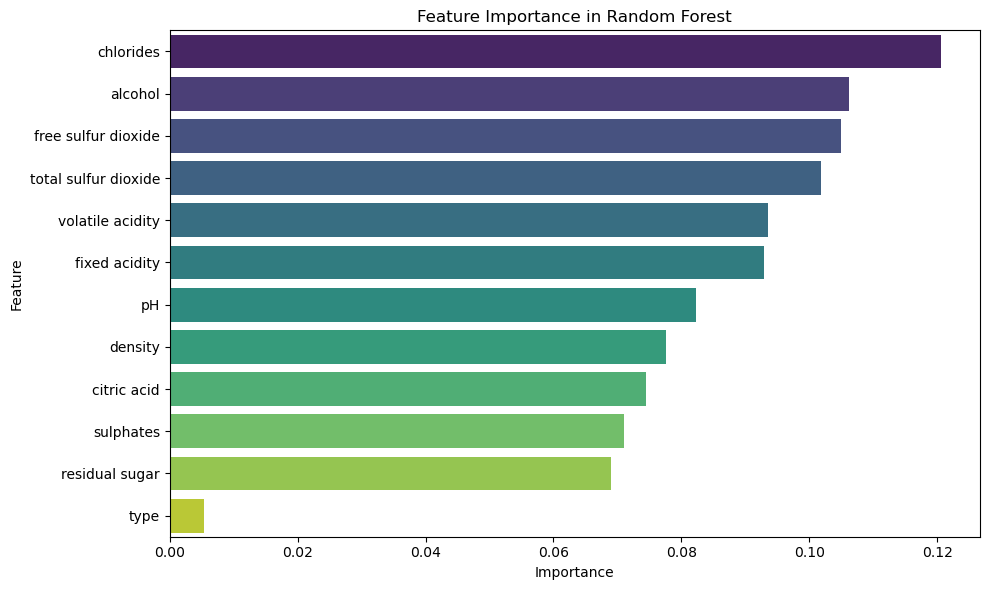

In [5]:
# 특징 중요도 시각화
importances = rf_model.feature_importances_
feature_names = X.columns

# 시각화를 위한 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특징 중요도 플롯
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()